In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import os
import re
import string
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Embedding, LSTM
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

1. Повнозв'язані нейронні мережі

In [28]:
df = pd.read_csv("user_behavior_dataset.csv")
print(df.shape)
df.head()

(700, 11)


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [29]:
label_encoders = {}
for col in ['Device Model', 'Operating System', 'Gender']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0,393,6.4,1872,67,1122,40,1,4
1,2,1,0,268,4.7,1331,42,944,47,0,3
2,3,3,0,154,4.0,761,32,322,42,1,2
3,4,0,0,239,4.8,1676,56,871,20,1,3
4,5,4,1,187,4.3,1367,58,988,31,0,3


In [31]:
X = df.drop(columns=['User ID', 'User Behavior Class'])
y = df['User Behavior Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

y_train_one_hot = to_categorical(y_train - 1) 
y_test_one_hot = to_categorical(y_test - 1)

In [33]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # Выходной слой
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

D:\маг1курс\ІАД\lab3\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
history = model.fit(X_train, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1744 - loss: 1.6920 - val_accuracy: 0.3036 - val_loss: 1.5776
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3813 - loss: 1.5331 - val_accuracy: 0.5000 - val_loss: 1.4622
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5078 - loss: 1.4238 - val_accuracy: 0.5893 - val_loss: 1.3160
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7139 - loss: 1.2429 - val_accuracy: 0.7054 - val_loss: 1.1089
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7105 - loss: 1.0290 - val_accuracy: 0.7321 - val_loss: 0.8864
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7264 - loss: 0.8499 - val_accuracy: 0.8304 - val_loss: 0.7153
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8280 - loss: 0.6549 - val_accuracy: 0.8839 - val_loss: 0.5934
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8957 - loss: 0.5779 - val_accuracy: 0.9107 - val_loss

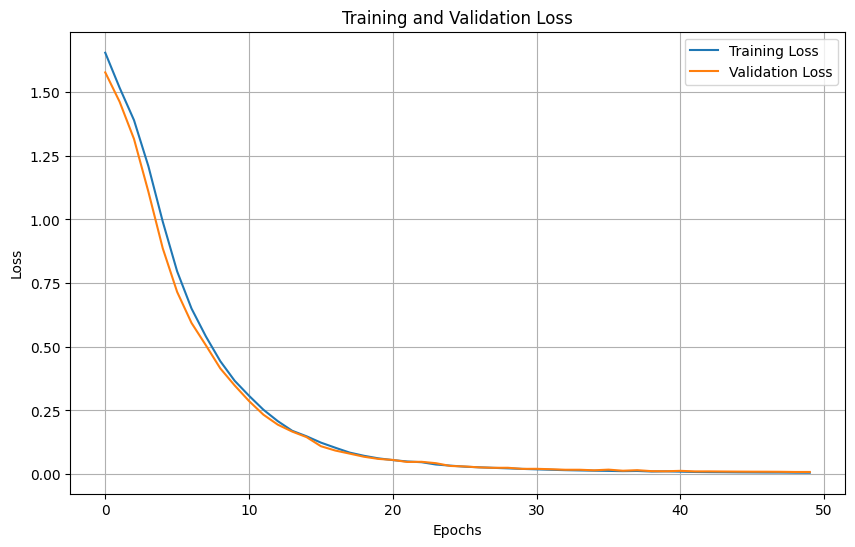

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Отримана точність методом kNN з 1-ої роботи:

               precision    recall  f1-score   support

           1       0.89      0.92      0.90        36
           2       0.91      0.91      0.91        47
           3       1.00      0.94      0.97        50
           4       0.90      1.00      0.95        36
           5       1.00      0.95      0.97        41

    accuracy                           0.94       210
   macro avg       0.94      0.94      0.94       210
weighted avg       0.95      0.94      0.94       210

accuracy:  0.9428571428571428

2. Згорткові нейронні мережі

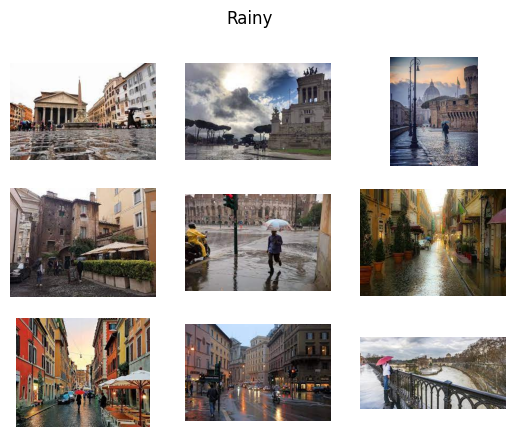

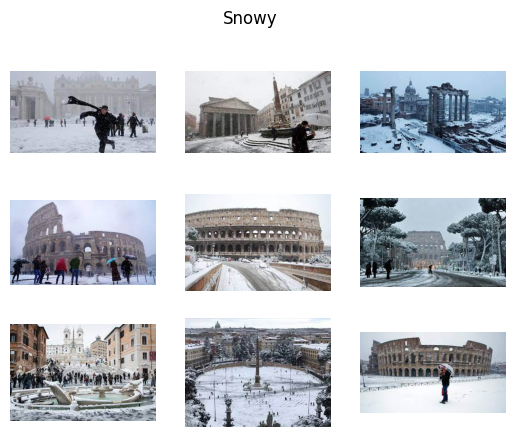

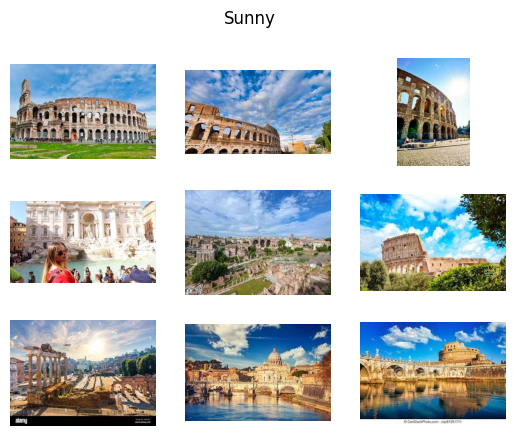

In [38]:
path = 'RomeWeather/' #https://www.kaggle.com/datasets/at081028/starwars-images
categories = ['Rainy', 'Snowy', 'Sunny']
img_size = (150, 150)  # Resize all images to this size
batch_size = 32
num_classes = 3

# display images
for category in categories:
    fig, axs = plt.subplots(3, 3)
    fig.suptitle(category)
    for n, f_name in enumerate(os.listdir(path + category)[:9]):
        img = plt.imread(path + category + '/' + f_name)
        axs[n // 3, n % 3].imshow(img)
        axs[n // 3, n % 3].axis('off')
    plt.show()

In [39]:
data = []
labels = []
for idx, category in enumerate(categories):
    folder = os.path.join(path, category)
    for file_name in os.listdir(folder):
        img_path = os.path.join(folder, file_name)
        img = tf.keras.utils.load_img(img_path, target_size=img_size)
        img_array = tf.keras.utils.img_to_array(img)
        data.append(img_array)
        labels.append(idx)

data = np.array(data) / 255.0  # Normalize images
labels = tf.keras.utils.to_categorical(labels, num_classes=num_classes)

In [40]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)


In [43]:
# a) Model from scratch
model_scratch = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model_scratch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_scratch = model_scratch.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=batch_size)


D:\маг1курс\ІАД\lab3\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 526ms/step - accuracy: 0.2798 - loss: 1.8457 - val_accuracy: 0.3333 - val_loss: 1.1092
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.3954 - loss: 1.1037 - val_accuracy: 0.5000 - val_loss: 1.0708
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.5490 - loss: 1.0662 - val_accuracy: 0.7333 - val_loss: 1.0090
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.5681 - loss: 0.9865 - val_accuracy: 0.5000 - val_loss: 0.9234
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.6333 - loss: 0.8748 - val_accuracy: 0.8667 - val_loss: 0.7046
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.7177 - loss: 0.6890 - val_accuracy: 0.6667 - val_loss: 0.7469
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.7488 - loss: 0.5709 - val_accuracy: 0.7333 - val_loss: 0.6344
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.8175 - loss: 0.4941 - val_accuracy: 0.7667 - val_loss:

In [44]:
# b) Transfer learning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))
base_model.trainable = False  # Freeze base model layers

model_transfer = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_transfer = model_transfer.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=batch_size)



Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.2792 - loss: 4.6410 - val_accuracy: 0.4000 - val_loss: 1.6085
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 663ms/step - accuracy: 0.3504 - loss: 2.6902 - val_accuracy: 0.3667 - val_loss: 1.4418
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 658ms/step - accuracy: 0.3360 - loss: 1.9642 - val_accuracy: 0.3333 - val_loss: 1.7381
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 664ms/step - accuracy: 0.4840 - loss: 1.7410 - val_accuracy: 0.4333 - val_loss: 1.2992
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 645ms/step - accuracy: 0.3913 - loss: 1.2354 - val_accuracy: 0.4000 - val_loss: 1.1254
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 654ms/step - accuracy: 0.3760 - loss: 1.1400 - val_accuracy: 0.3000 - val_loss: 1.0845
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 657ms/step - accuracy: 0.3094 - loss: 1.0886 - val_accuracy: 0.3667 - val_loss: 1.0928
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 924ms/step - accuracy: 0.3377 - loss: 1.0876 - val_accuracy: 0.3667 - val_loss: 1

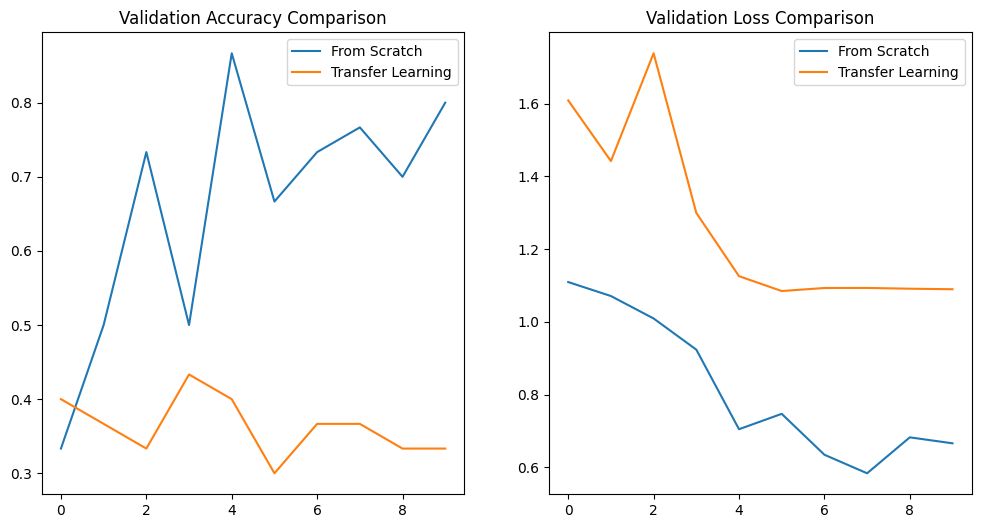

In [45]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_scratch.history['val_accuracy'], label='From Scratch')
plt.plot(history_transfer.history['val_accuracy'], label='Transfer Learning')
plt.title('Validation Accuracy Comparison')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_scratch.history['val_loss'], label='From Scratch')
plt.plot(history_transfer.history['val_loss'], label='Transfer Learning')
plt.title('Validation Loss Comparison')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


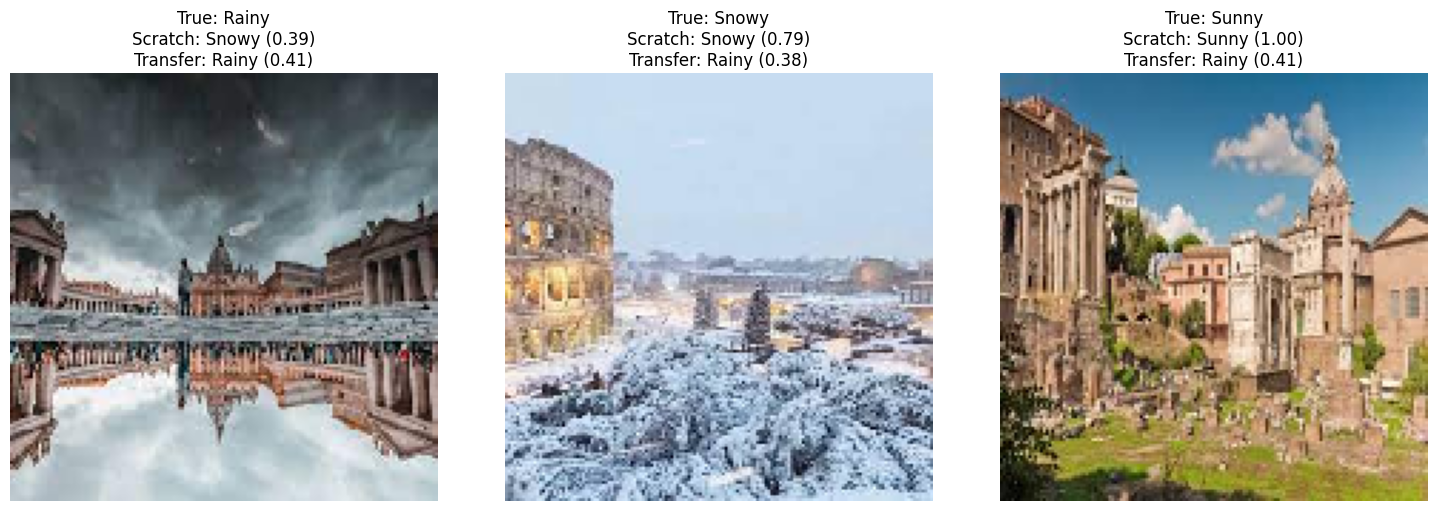

In [49]:
example_images = {
    "Rainy": "RomeWeather/Rainy/download.jpg",
    "Snowy": "RomeWeather/Snowy/download (7).jpg",
    "Sunny": "RomeWeather/Sunny/images (30).jpg"
}

def predict_and_display(model1, model2, img_paths, category_names):
    fig, axs = plt.subplots(1, len(img_paths), figsize=(15, 5))

    for i, (label, img_path) in enumerate(img_paths.items()):
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predictions for both models
        prediction1 = model1.predict(img_array)
        predicted_class1 = category_names[np.argmax(prediction1)]
        confidence1 = np.max(prediction1)

        prediction2 = model2.predict(img_array)
        predicted_class2 = category_names[np.argmax(prediction2)]
        confidence2 = np.max(prediction2)

        # Display the image and predictions
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(f"True: {label}\nScratch: {predicted_class1} ({confidence1:.2f})\nTransfer: {predicted_class2} ({confidence2:.2f})")

    plt.tight_layout()
    plt.show()

category_names = categories

predict_and_display(model_scratch, model_transfer, example_images, category_names)



3. Рекурентні нейронні мережі

In [51]:
df_spam = pd.read_csv('spam.csv') 
df_spam.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
df_spam = df_spam[['Class', 'Message']]
df_spam['Class'] = df_spam['Class'].map({'ham': 0, 'spam': 1})

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    df_spam['Message'], df_spam['Class'], test_size=0.2, random_state=42)

tokenizer = Tokenizer(num_words=10000)  # Залишимо тільки 10,000 найбільш частих слів
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

maxlen = 50  
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)


In [56]:
# Модель з нуля
model_scratch = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=maxlen),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

model_scratch.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_scratch.summary()

history_scratch = model_scratch.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))


D:\маг1курс\ІАД\lab3\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8982 - loss: 0.2699 - val_accuracy: 0.9830 - val_loss: 0.0562
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9924 - loss: 0.0309 - val_accuracy: 0.9910 - val_loss: 0.0392
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9967 - loss: 0.0095 - val_accuracy: 0.9901 - val_loss: 0.0433
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9997 - loss: 0.0027 - val_accuracy: 0.9883 - val_loss: 0.0505
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9919 - val_loss: 0.0493


In [57]:
# Завантаження попередньо навчених ембеддінгів (наприклад, GloVe)
embedding_index = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Побудова матриці ембеддінгів
embedding_dim = 100
embedding_matrix = np.zeros((10000, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < 10000:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Модель з попередньо навченими ембеддінгами
model_pretrained = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, weights=[embedding_matrix],
              input_length=maxlen, trainable=False),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

model_pretrained.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_pretrained.summary()

# Навчання
history_pretrained = model_pretrained.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))


D:\маг1курс\ІАД\lab3\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8561 - loss: 0.3144 - val_accuracy: 0.9641 - val_loss: 0.0974
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9750 - loss: 0.0836 - val_accuracy: 0.9785 - val_loss: 0.0756
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9800 - loss: 0.0573 - val_accuracy: 0.9785 - val_loss: 0.0644
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9856 - loss: 0.0442 - val_accuracy: 0.9785 - val_loss: 0.0652
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9902 - loss: 0.0355 - val_accuracy: 0.9767 - val_loss: 0.0611


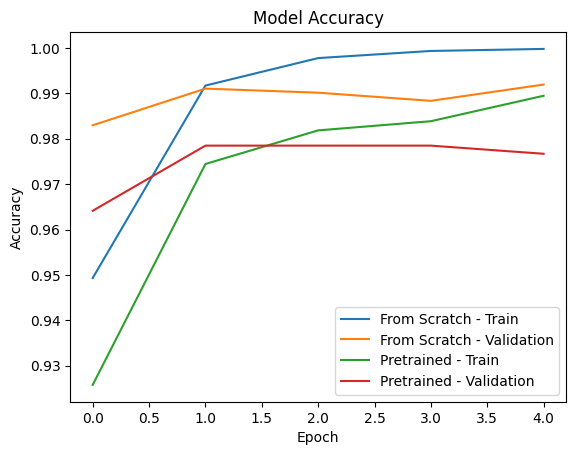

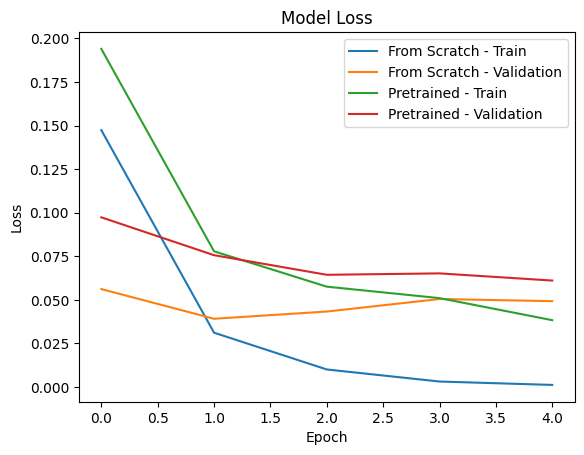

In [58]:
# Графіки точності
plt.plot(history_scratch.history['accuracy'], label='From Scratch - Train')
plt.plot(history_scratch.history['val_accuracy'], label='From Scratch - Validation')
plt.plot(history_pretrained.history['accuracy'], label='Pretrained - Train')
plt.plot(history_pretrained.history['val_accuracy'], label='Pretrained - Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Графіки втрат
plt.plot(history_scratch.history['loss'], label='From Scratch - Train')
plt.plot(history_scratch.history['val_loss'], label='From Scratch - Validation')
plt.plot(history_pretrained.history['loss'], label='Pretrained - Train')
plt.plot(history_pretrained.history['val_loss'], label='Pretrained - Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()